In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Данные data_2d:
   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  

Данные mnist:
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...   

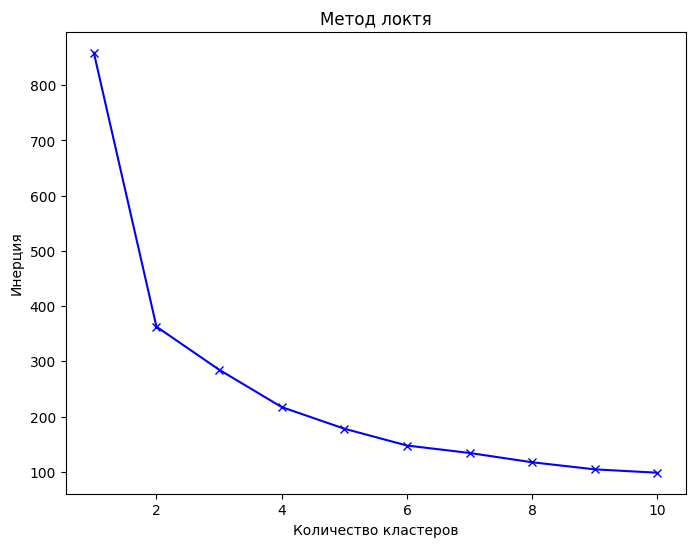


Применение метода локтя к mnist:


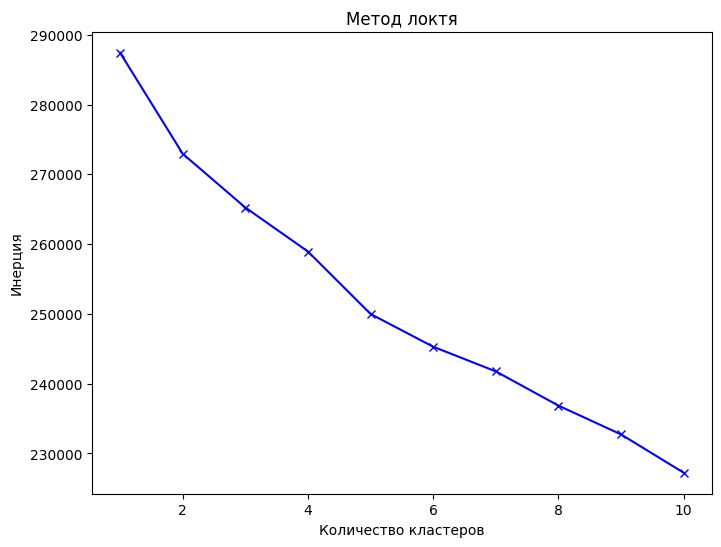

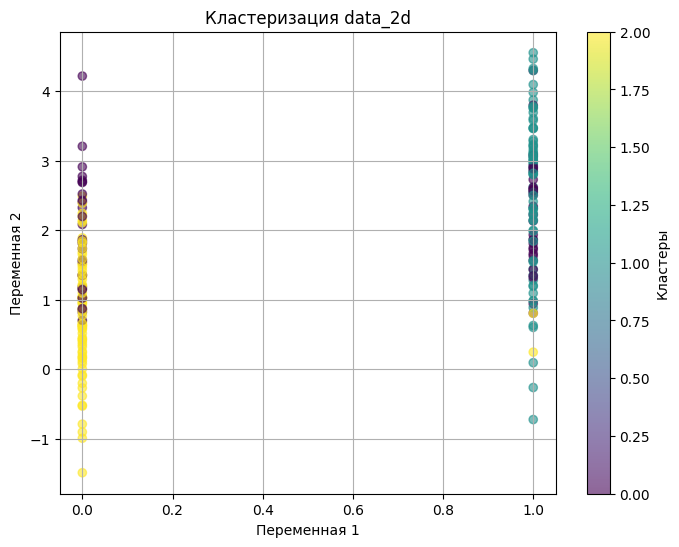

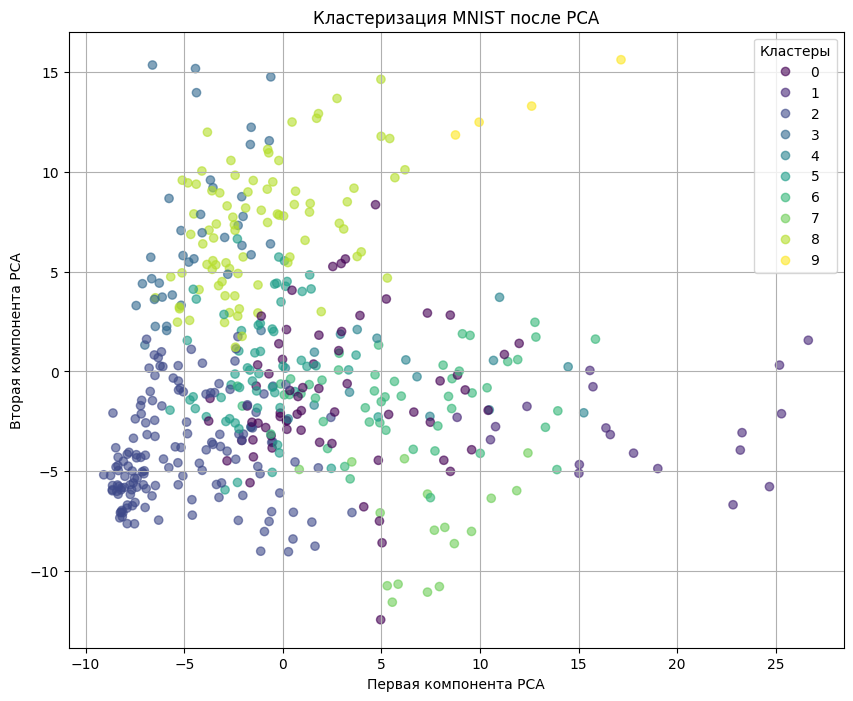

In [2]:
data_2d = pd.read_csv('data_2d.csv')
mnist = pd.read_csv('mnist.csv')

print("Данные data_2d:")
print(data_2d.head())
print("\nДанные mnist:")
print(mnist.head())

def elbow_method(data, max_clusters=10):
    inertia = []
    K = range(1, max_clusters + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Инерция')
    plt.title('Метод локтя')
    plt.show()

scaler = StandardScaler()
mnist_scaled = scaler.fit_transform(mnist)

print("\nПрименение метода локтя к data_2d:")
elbow_method(data_2d)

print("\nПрименение метода локтя к mnist:")
elbow_method(mnist_scaled)

optimal_k_2d = 3
kmeans_2d = KMeans(n_clusters=optimal_k_2d, random_state=42)
data_2d['Cluster'] = kmeans_2d.fit_predict(data_2d)

optimal_k_mnist = 10
kmeans_mnist = KMeans(n_clusters=optimal_k_mnist, random_state=42)
mnist['Cluster'] = kmeans_mnist.fit_predict(mnist_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=data_2d['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Кластеризация data_2d')
plt.xlabel('Переменная 1')
plt.ylabel('Переменная 2')
plt.colorbar(label='Кластеры')
plt.grid()
plt.show()

pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist['Cluster'], cmap='viridis', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Кластеры")
plt.title('Кластеризация MNIST после PCA')
plt.xlabel('Первая компонента PCA')
plt.ylabel('Вторая компонента PCA')
plt.grid()
plt.show()